# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal

To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Data Preparation

## Data import and exploration

In [1]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Supressing warning

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing dataset

bike = pd.read_csv('day.csv')

In [4]:
# Exploring the first 5 rows

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Checking the shape

bike.shape

(730, 16)

In [6]:
# Checking the columns

bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# Checking column info

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Checking numerical column summary

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# Checking for percentage of null values

round(100*(bike.isnull().sum()/len(bike.index)), 2).sort_values(ascending=False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

### Observation

- There are in total 730 data entries and 16 columns.
- Most of the variables are in either int or float format. 
- However, some variables such as  'mnth', 'weekday', 'season' , 'weathersit', 'yr','workingday' and 'holiday' seem to be categorical in nature. We need to convert these into categorical values for better readability of data. 
- There are no null or missing values present.

- We also observed few columns which are not relevant to the business requirement and hence can be dropped before we go further. Those columns are -

    - 'instant' - as it has index-like values, which we do not need here.
    - 'dteday' - as we already have the year, month, day info in separate columns. So, we do not need this one.
    - 'casual' and 'registered' - as the business goal for the management is to understand how exactly the demands vary with different features and they might be interested in the count in total irrespective of the customer categories.


## Data Transformation

In [10]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### Dropping unnecessary columns

As we saw in the previous step, in the data set we have few columns which do not contribute towards business goal and thus can be ignored for our analysis. Such columns are instant, dteday, casual and registered. Let's drop these columns.

In [11]:
# Drop the unnecessary columns

columns = ['instant','dteday','casual','registered']
bike.drop(columns,axis=1,inplace=True)

##### Converting categorical columns to have proper categorical values as per data dictionary

There are few categorical columns in this data set which hold the values in numerical form. Let's convert them to their respective categorical form as per the data dictionary for better representation and understanding of data. But before that we need to convert them into category type.


In [12]:
# Convert categorical columns into category type

cols = ['season', 'mnth', 'weekday', 'weathersit', 'yr', 'holiday', 'workingday']


for i in cols:
    bike[i] = bike[i].astype('category')

In [13]:
# Convert 'season' as per data dictionary - 1:spring, 2:summer, 3:fall, 4:winter

bike[['season']] = bike[['season']].apply(lambda x: x.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}))

In [14]:
# Convert 'mnth' column as per data dictionary 

bike[['mnth']] = bike[['mnth']].apply(lambda x: x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',
                                                       5:'May',6:'Jun',7:'Jul',8:'Aug',
                                                       9:'Sep',10:'Oct',11:'Nov',12:'Dec'}))


In [15]:
# Convert 'weekday' as per data dictionary - day of the week

bike[['weekday']] = bike[['weekday']].apply(lambda x: x.map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 
                                                                   4: 'Thu', 5: 'Fri', 6: 'Sat'}))

Here I have assumed 0 - 6 as Sun - Sat.

In [16]:
# Convert 'weather' column as per data dictionary - 

# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

bike[['weathersit']] = bike[['weathersit']].apply(lambda x: x.map({1:'Good', 2:'Fair', 3:'Bad', 4:'Very Bad'}))


In [17]:
# Convert 'yr' column as per data dictionary -

bike[['yr']] = bike[['yr']].apply(lambda x: x.map({1:'2019', 0:'2018'}))

In [18]:
# Convert 'holiday' & 'workingday' column as per data dictionary -

bike[['holiday']] = bike[['holiday']].apply(lambda x: x.map({1:'Yes', 0:'No'}))
bike[['workingday']] = bike[['workingday']].apply(lambda x: x.map({1:'Yes', 0:'No'}))

In [19]:
# Verify the first 5 rows

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,No,Mon,Yes,Fair,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,No,Tue,Yes,Fair,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,No,Wed,Yes,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,No,Thu,Yes,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,No,Fri,Yes,Good,9.305237,11.46350,43.6957,12.522300,1600


## EDA and Data Visualisation

In this step we are going to visualize and explore the categorical as well as continuous variables present in the data set.

#### Univariate Analysis - Continuous

In [20]:
#Find out the numerical columns

bike.describe().columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')

From the data set we can see that the columns 'temp','atemp','hum','windspeed' and 'cnt' are numerical in nature. We can plot distribution plot for them to understand better.

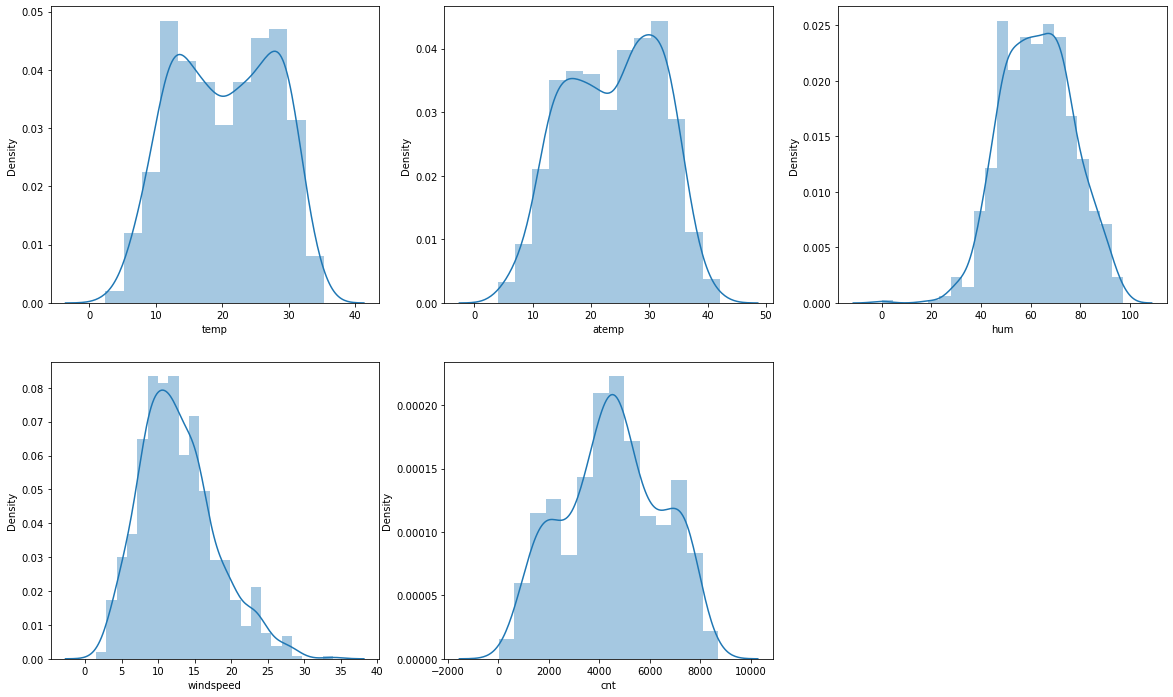

In [21]:
# Visualise the distribution of numerical variables


plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(bike['temp'])
plt.subplot(2,3,2)
sns.distplot(bike['atemp'])
plt.subplot(2,3,3)
sns.distplot(bike['hum'])
plt.subplot(2,3,4)
sns.distplot(bike['windspeed'])
plt.subplot(2,3,5)
sns.distplot(bike['cnt'])

plt.show()

Inference

- Most of the days have temperature 10-30 degrees. T
- Distribution of temp and atemp are almost similar.
- Most of the days are with humidity 50-80.
- Wind speed seems to be distributed mostly between 5 - 20.
- Total count of rental bikes seems to be normally distributed with a mean value between 4000-5000.


#### Univariate Analysis - Categorical

In [22]:
# Find all categorical columns

categorical_cols = bike.select_dtypes(exclude = ['float64','int64'])
categorical_cols.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

The categorical variables are - season, weathersit, workingday, holiday, month, weekday, yr

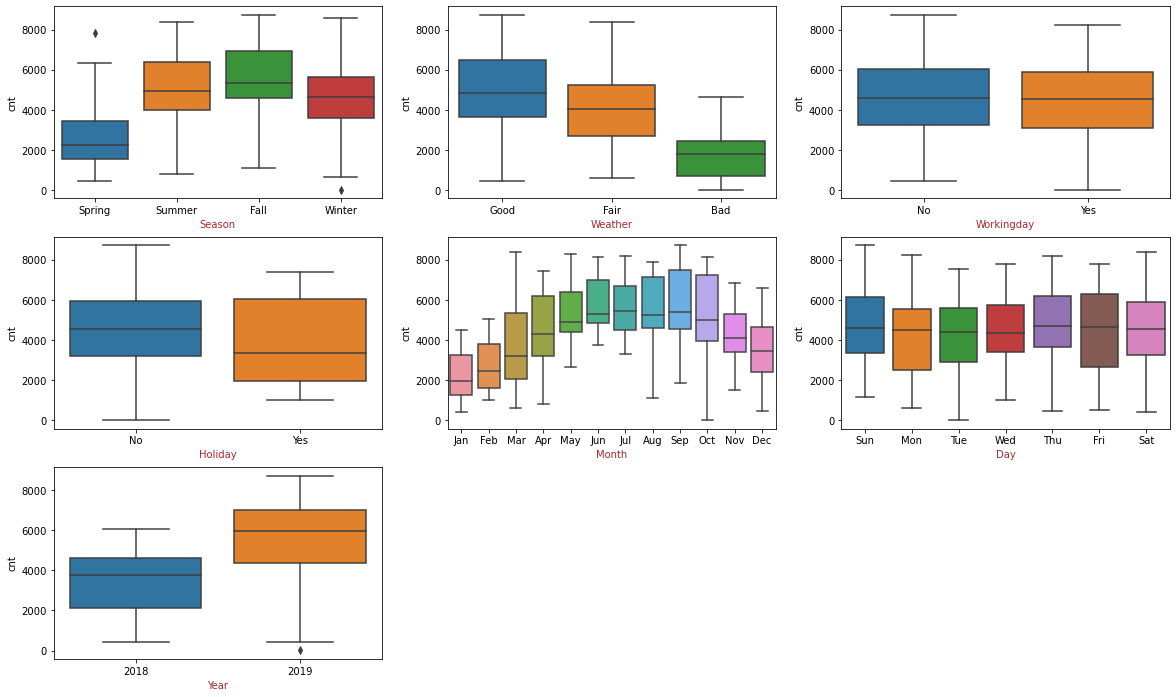

In [23]:
# Visualise the categorical variables


plt.figure(figsize=(20, 12))

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.xlabel('Season', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(3,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.xlabel('Weather', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.xlabel('Workingday', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.xlabel('Holiday', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.xlabel('Month', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.xlabel('Day', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.xlabel('Year', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})


plt.show()

#### Observation

- There are no significant outliers as such present in the data
- Weather is surely impacting the bike rental counts as clearly visible from the plot. The meadin value is highest when the weather is good and then decreasing as the weather becomes worse.
- Season is also a fairly contributing factor in the total rental count. Summer and Fall are more favourable seasons.
- Working day seems to have a very little impact.
- More bikes are rented between the months Jun-Oct. 
- Most of the days are good or fair weather days.
- Demand seems to be less on holidays.

#### Bivariate Analysis - Categorical - Categorical

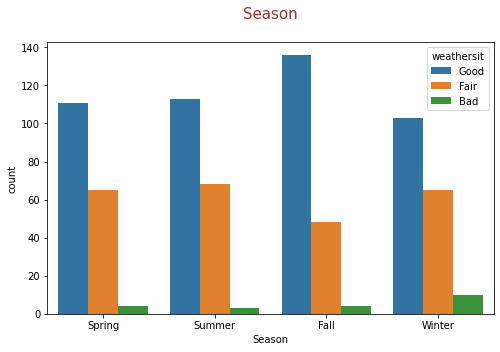

In [24]:
# Plotting Season - Weather

plt.figure(figsize = [8,5])
sns.countplot(bike['season'],hue=bike['weathersit'])
plt.title('Season\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('Season')
plt.show()

Inference

- Most of the days in Fall season were good with clear sky followed by Summer, Spring and Winter. 
- Winter has most number of bad weather days.

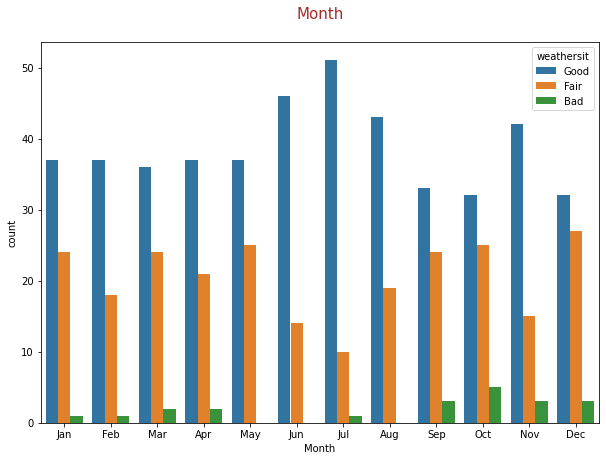

In [25]:
# Plotting Month - Weather

plt.figure(figsize = [10,7])
sns.countplot(bike['mnth'],hue=bike['weathersit'])
plt.title('Month\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('Month')
plt.show()

Inference

- Most of the days in the month of June, July, August and November are good weather days.
- October has the most number of bad weather days with heavy shower/snow.

#### Bivariate Analysis - Categorical - Continuous

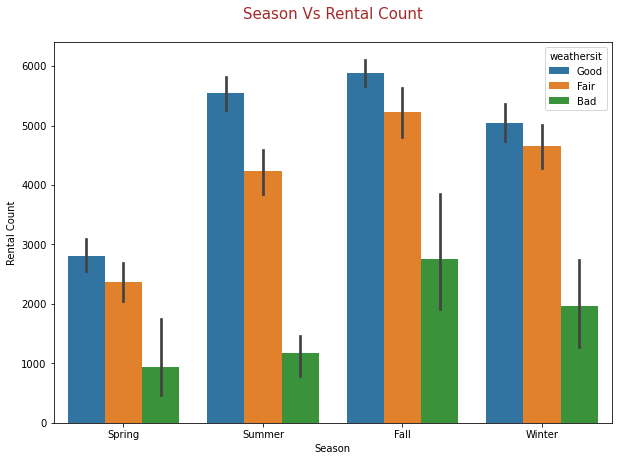

In [26]:
# Plotting Season - Rental Count

plt.figure(figsize=[10,7])
sns.barplot(x=bike['season'],y=bike['cnt'], hue = bike['weathersit'])
plt.title('Season Vs Rental Count\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('Season')
plt.ylabel('Rental Count')
plt.show()

Inference

- Rental count was the highest in the Fall season irrespective of the weather condition.
- Spring season has the lowest demand.

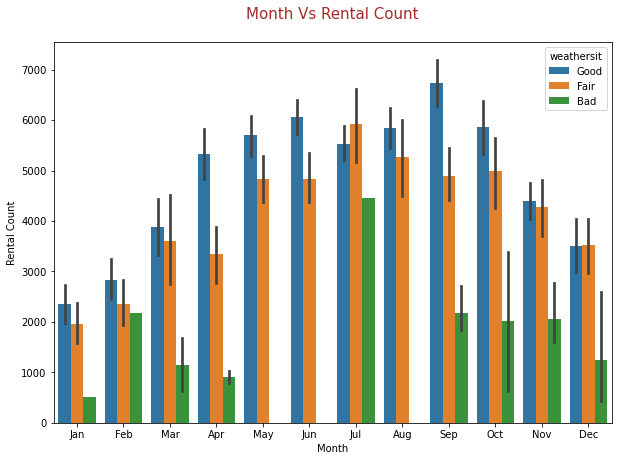

In [27]:
# Plotting Month - Rental Count

plt.figure(figsize=[10,7])
sns.barplot(x=bike['mnth'],y=bike['cnt'], hue = bike['weathersit'])
plt.title('Month Vs Rental Count\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('Month')
plt.ylabel('Rental Count')
plt.show()

Inference

- In most of the months if weather is good/fair, demand is more.
- In July, irrespective of the weather condition, demand is high.
- The demand is the lowest in the month of January.

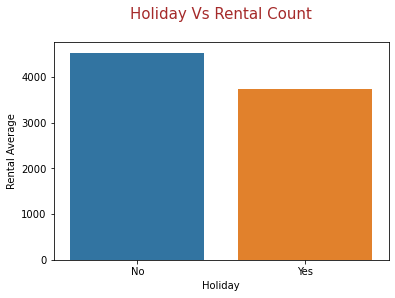

In [28]:
# Check if holidays have an impact on demand

holiday_df = bike.groupby(['holiday'])['cnt'].mean().reset_index()
sns.barplot(x='holiday', y='cnt', data=holiday_df)
plt.xlabel('Holiday')
plt.ylabel('Rental Average')
plt.title('Holiday Vs Rental Count\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

Inference

- Looks like holidays have less demand.

#### Bivariate Analysis - Continuous - Continuous

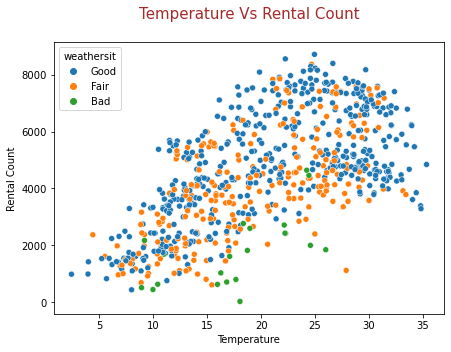

In [29]:
# Plotting Temperature Vs Rental Count

plt.figure(figsize=[7, 5])
sns.scatterplot(x = bike['temp'], y = bike['cnt'], hue = bike['weathersit'])
plt.title('Temperature Vs Rental Count\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('Temperature')
plt.ylabel('Rental Count')
plt.show()

Inference

- Temperature and rental count are highly correlated.
- The demand is high on good weather days and when temperature is pleasant (20-30 degree).

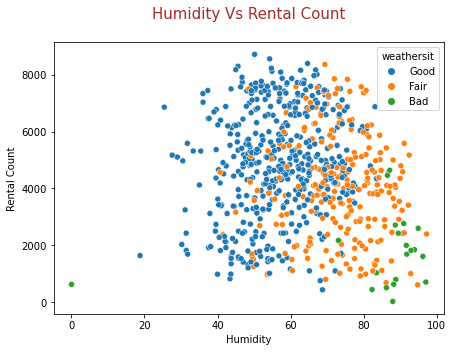

In [30]:
# Plotting Humidity Vs Rental Count

plt.figure(figsize=[7, 5])
sns.scatterplot(x = bike['hum'], y = bike['cnt'], hue = bike['weathersit'])
plt.title('Humidity Vs Rental Count\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('Humidity')
plt.ylabel('Rental Count')
plt.show()

Inference

- Humidity and rental count are negatively correlated.
- The demand is high on good weather days when humidity is low (40-60).

#### Visulaise numerical variables using pairplot

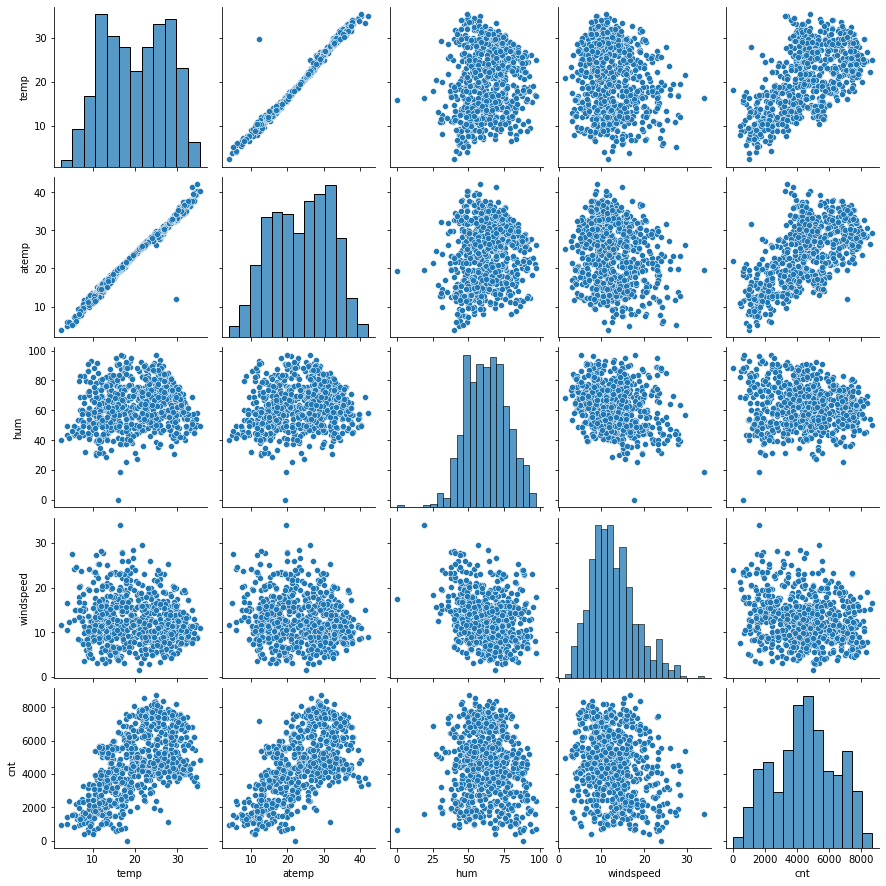

In [31]:
# Visualise the numerical variables

sns.pairplot(bike[['temp','atemp','hum','windspeed','cnt']])
plt.show()


#### Observation

- 'temp' and 'atemp' are highly correlated, which means their impact on the total rental counts are fairly similar. Hence, we may consider just one (say temp) and ignore the other one while building our model to avoid any multicollinearity.


#### Find correlation among numerical variables

In [32]:
# Find the correlation

bike_corr = bike.corr()
bike_corr

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


#### Heatmap to check correlation

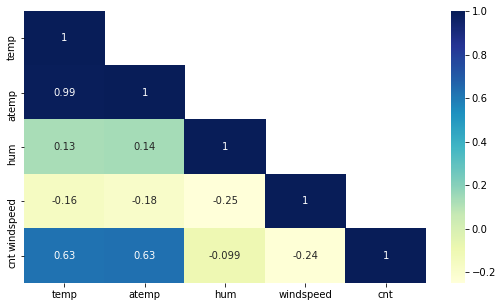

In [33]:

# Plot the heatmap

plt.figure(figsize=(9,5))
mask = np.array(bike_corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(bike_corr, mask = mask,annot=True, cmap='YlGnBu')
plt.show()

Inference


- 'temp' and 'atemp' are very highly correlated. If both present, they might introduce multicollinearity. Hence, we need to keep any one and drop the other one as they both have same correlation coefficient 0.63 with the target variable 'cnt'.
- From the above heatmap we can clearly see that the independent variables 'temp' and 'atemp' are highly correlated to the dependent variable 'cnt', followed by 'windspeed'.
- 'windspeed' and 'humidity' are correlated with a negative coefficient as humidity tends to be more when there is less wind.


Assumption - To get rid of independent variables with coefficient > 0.7 or < -0.7 with other independent variable(s).

In [34]:
# Drop 'atemp' column

bike.drop('atemp', axis=1, inplace=True)

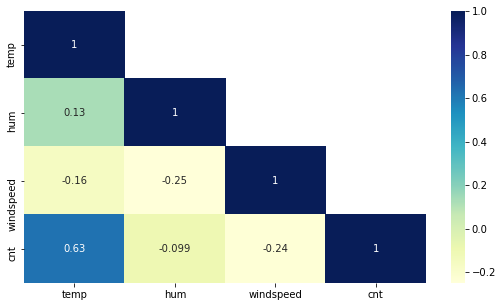

In [35]:
# Check the correlation using heatmap
bike_corr = bike.corr()
plt.figure(figsize=(9,5))
mask = np.array(bike_corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(bike_corr, mask = mask,annot=True, cmap='YlGnBu')
plt.show()

Now that we have dropped 'atemp' , we don't have any other very highly correlated independent variables. We can now start with model building process.

# Data Preparation

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 

In [36]:
# Checking column info

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(7), float64(3), int64(1)
memory usage: 29.3 KB


#### Creating Dummy variables for the categorical columns

As we saw that the 'weekday','mnth','season','weathersit','yr','holiday' & 'workingday' columns are categorical in nature. Hence, we will create dummy variables for them. 

In [37]:
# Creating dummy variables


dummy = pd.get_dummies(bike[['weekday','mnth','season','weathersit','yr','holiday','workingday']], drop_first = True)
dummy.head()

,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,...,mnth_Nov,mnth_Dec,season_Summer,season_Fall,season_Winter,weathersit_Fair,weathersit_Bad,yr_2019,holiday_Yes,workingday_Yes
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
# We will concat bike with dummy

bike = pd.concat([bike, dummy], axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Nov,mnth_Dec,season_Summer,season_Fall,season_Winter,weathersit_Fair,weathersit_Bad,yr_2019,holiday_Yes,workingday_Yes
0,Spring,2018,Jan,No,Mon,Yes,Fair,14.110847,80.5833,10.749882,...,0,0,0,0,0,1,0,0,0,1
1,Spring,2018,Jan,No,Tue,Yes,Fair,14.902598,69.6087,16.652113,...,0,0,0,0,0,1,0,0,0,1
2,Spring,2018,Jan,No,Wed,Yes,Good,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,1
3,Spring,2018,Jan,No,Thu,Yes,Good,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,1
4,Spring,2018,Jan,No,Fri,Yes,Good,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,1


In [39]:
# Checking info

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   season           730 non-null    category
 1   yr               730 non-null    category
 2   mnth             730 non-null    category
 3   holiday          730 non-null    category
 4   weekday          730 non-null    category
 5   workingday       730 non-null    category
 6   weathersit       730 non-null    category
 7   temp             730 non-null    float64 
 8   hum              730 non-null    float64 
 9   windspeed        730 non-null    float64 
 10  cnt              730 non-null    int64   
 11  weekday_Mon      730 non-null    uint8   
 12  weekday_Tue      730 non-null    uint8   
 13  weekday_Wed      730 non-null    uint8   
 14  weekday_Thu      730 non-null    uint8   
 15  weekday_Fri      730 non-null    uint8   
 16  weekday_Sat      730 non-null    uint8   
 1

In [40]:
# Dropping the categorical columns as we have created dummy for them

columns =['weekday','mnth','season','weathersit','yr','holiday','workingday']
bike.drop(columns, axis = 1, inplace = True)

In [41]:
# Checking info

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp             730 non-null    float64
 1   hum              730 non-null    float64
 2   windspeed        730 non-null    float64
 3   cnt              730 non-null    int64  
 4   weekday_Mon      730 non-null    uint8  
 5   weekday_Tue      730 non-null    uint8  
 6   weekday_Wed      730 non-null    uint8  
 7   weekday_Thu      730 non-null    uint8  
 8   weekday_Fri      730 non-null    uint8  
 9   weekday_Sat      730 non-null    uint8  
 10  mnth_Feb         730 non-null    uint8  
 11  mnth_Mar         730 non-null    uint8  
 12  mnth_Apr         730 non-null    uint8  
 13  mnth_May         730 non-null    uint8  
 14  mnth_Jun         730 non-null    uint8  
 15  mnth_Jul         730 non-null    uint8  
 16  mnth_Aug         730 non-null    uint8  
 17  mnth_Sep        

Now we have all numerical values.

In [42]:
# Verifying the changes

bike.head()

,temp,hum,windspeed,cnt,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,...,mnth_Nov,mnth_Dec,season_Summer,season_Fall,season_Winter,weathersit_Fair,weathersit_Bad,yr_2019,holiday_Yes,workingday_Yes
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,14.902598,69.6087,16.652113,801,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,8.050924,43.7273,16.636703,1349,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9.305237,43.6957,12.522300,1600,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


## Splitting data into Train and Test

Let's split the entire data set into train and test set in 70-30 proportion. We will build our model on the train set and will verify it on the test set.

In [43]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.70, test_size = 0.30, random_state = 100)

In [44]:
# Check the train set shape

df_train.shape

(510, 29)

In [45]:
# Check the train set first 5 rows

df_train.head()

,temp,hum,windspeed,cnt,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,...,mnth_Nov,mnth_Dec,season_Summer,season_Fall,season_Winter,weathersit_Fair,weathersit_Bad,yr_2019,holiday_Yes,workingday_Yes
653,19.201653,55.8333,12.208807,7534,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
576,29.246653,70.4167,11.083475,7216,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
426,16.980847,62.1250,10.792293,4066,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
728,10.489153,48.3333,23.500518,1796,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
482,15.443347,48.9583,8.708325,4220,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [46]:
# Check the test set shape

df_test.shape

(219, 29)

In [47]:
# Check the test set first 5 rows

df_test.head()

,temp,hum,windspeed,cnt,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,...,mnth_Nov,mnth_Dec,season_Summer,season_Fall,season_Winter,weathersit_Fair,weathersit_Bad,yr_2019,holiday_Yes,workingday_Yes
184,29.793347,63.7917,5.459106,6043,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
535,32.082500,59.2083,7.625404,6211,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
299,19.270000,81.2917,13.250121,2659,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
221,31.433347,42.4167,13.417286,4780,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
152,29.315000,30.5000,19.583229,4968,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


## Rescaling the Features - Training data

It is important to rescale the variables so that they have a comparable scale. Here we will use Min-Max Scaler to rescale all numerical variables ( except the 'dummy' variables )

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler() to all the numerical columns except the 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [49]:
df_train.shape

(510, 29)

In [50]:
# Let's verify. The value should be between 0 -1 

df_train.describe()

,temp,hum,windspeed,cnt,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,...,mnth_Nov,mnth_Dec,season_Summer,season_Fall,season_Winter,weathersit_Fair,weathersit_Bad,yr_2019,holiday_Yes,workingday_Yes
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,...,0.086275,0.084314,0.245098,0.262745,0.24902,0.343137,0.029412,0.507843,0.025490,0.711765
std,0.225844,0.145882,0.169797,0.224593,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,...,0.281045,0.278131,0.430568,0.440557,0.43287,0.475223,0.169124,0.500429,0.157763,0.453386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


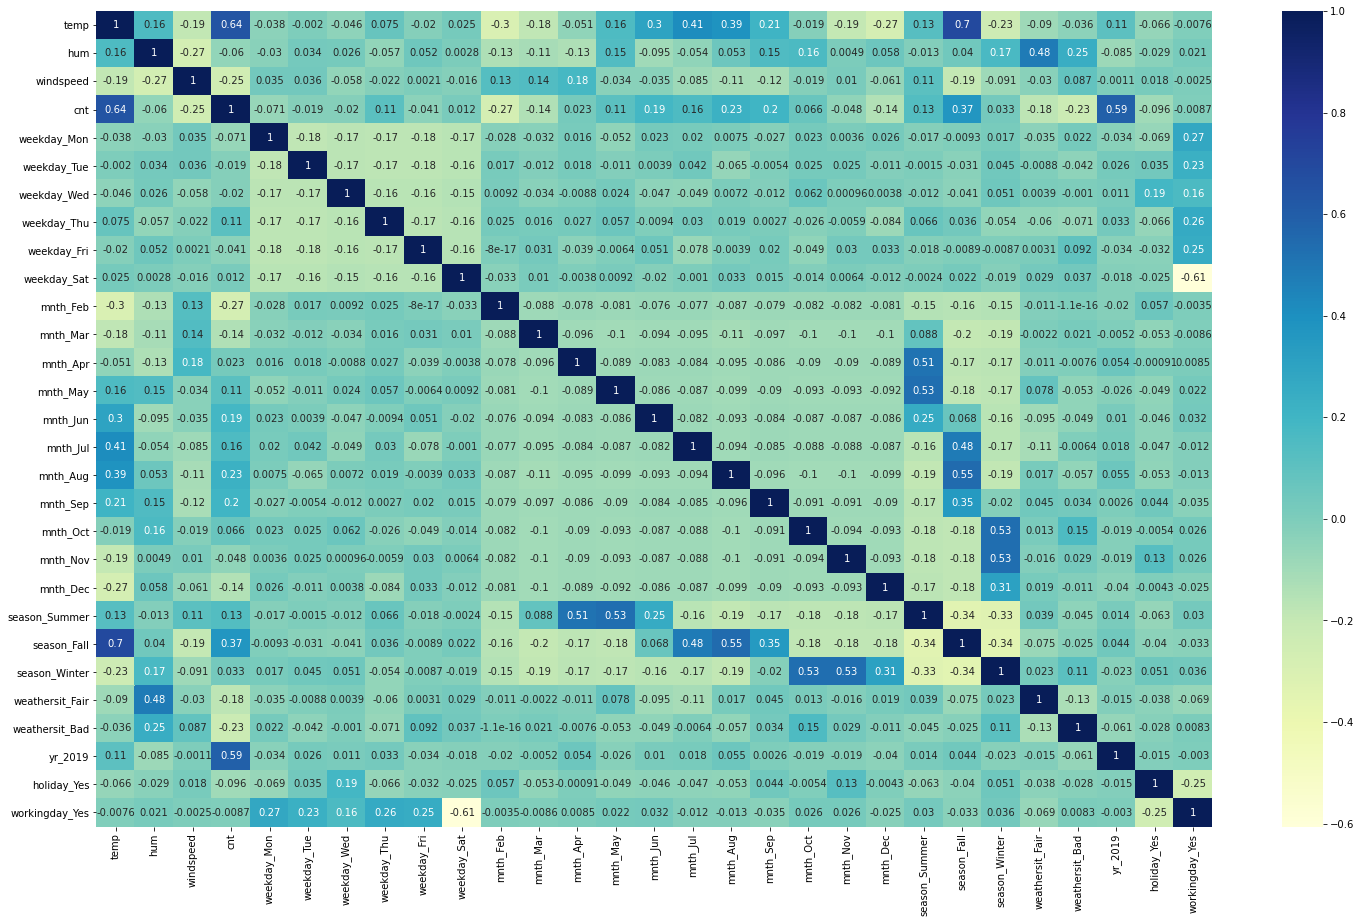

In [51]:
plt.figure(figsize=[25, 15])
sns.heatmap(df_train.corr(), cmap = "YlGnBu", annot = True)
plt.show()

#### Observation

- The heatmap above displays the collinearity between independent variables and the dependent (cnt) variable.
- This also tells us about existing multi-collinearity between the independent variables.
- This will be helpful while considering multiple independent variables in model building step.

# Hypothesis Formulation

The hypothesis can be formulated as -

- Null Hypothesis       - H0 : Coefficients of the independent variables are insignificant
- Alternate Hypothesis  - H1 : Coefficients of the independent variables are significant

# Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.

##### Assumptions

Before building the model, let's put the assumptions of a linear regression model -

- There is a linear relationship between X and y
- Error terms are normally distributed with a mean value 0
- Error terms have constant variance ( homoscedasticity )
- Error terms are independent of each other ( no multicollinearity )


Also we are going to assume 99% confidence interval. So, we will take into consideration p-value below 1%  or p-value < 0.01.
Similarly we will assume VIF limit of 5.

### Splitting training data into X and y

In [52]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE - Recursive Feature Elimination

First we will use RFE for feature elimination. The columns we get from RFE will be considered for further manual refining of the model.

In [53]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [54]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

# I chose 15 as I want to eliminate ~50% of the variables through RFE
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [55]:
# Listing out the columns with rfe ranking

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 7),
 ('weekday_Thu', False, 5),
 ('weekday_Fri', False, 6),
 ('weekday_Sat', False, 14),
 ('mnth_Feb', False, 10),
 ('mnth_Mar', True, 1),
 ('mnth_Apr', False, 2),
 ('mnth_May', True, 1),
 ('mnth_Jun', False, 3),
 ('mnth_Jul', False, 11),
 ('mnth_Aug', True, 1),
 ('mnth_Sep', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Nov', False, 12),
 ('mnth_Dec', False, 13),
 ('season_Summer', True, 1),
 ('season_Fall', True, 1),
 ('season_Winter', True, 1),
 ('weathersit_Fair', True, 1),
 ('weathersit_Bad', True, 1),
 ('yr_2019', True, 1),
 ('holiday_Yes', True, 1),
 ('workingday_Yes', False, 4)]

In [56]:
# Extracting the columns those are significant as per rfe

col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'mnth_Mar', 'mnth_May', 'mnth_Aug',
       'mnth_Sep', 'mnth_Oct', 'season_Summer', 'season_Fall', 'season_Winter',
       'weathersit_Fair', 'weathersit_Bad', 'yr_2019', 'holiday_Yes'],
      dtype='object')

In [57]:
# List of columns which are insignificant for model building as per rfe

X_train.columns[~rfe.support_]

Index(['weekday_Mon', 'weekday_Tue', 'weekday_Wed', 'weekday_Thu',
       'weekday_Fri', 'weekday_Sat', 'mnth_Feb', 'mnth_Apr', 'mnth_Jun',
       'mnth_Jul', 'mnth_Nov', 'mnth_Dec', 'workingday_Yes'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

##### Model 1

In [58]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [59]:
# Adding a constant variable 

import statsmodels.api as sm 

X_train_lm1 = sm.add_constant(X_train_rfe)

# Running the linear model 1

lm1 = sm.OLS(y_train,X_train_lm1).fit() 

#Let's see the summary of our linear model

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Sun, 10 Apr 2022   Prob (F-statistic):          2.95e-189
Time:                        20:38:21   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2376      0.027     

#### Observation

- Since R-squared is 0.846, we can say close to 84.6% of the variances in 'cnt' can be explained by these independent variables.
- The probability of most independent variables are nearly 0 i.e. they are significant. 
- mnth_May, season_Fall have high p-value.
- Co-efficient of few variables are negative. 

Let's now go for VIF calculation to be sure there is no multicollinearity.

### VIF Calculation

VIF or variance inflation factor explains how well a predictor variable is correlated with all the other variables, excluding the target variable.  

In [60]:
# Drop the const term

X_train_new = X_train_lm1.drop(['const'], axis=1)

In [61]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,24.64
1,hum,15.55
9,season_Fall,8.80
2,windspeed,3.80
8,season_Summer,3.73
10,season_Winter,3.13
11,weathersit_Fair,2.15
13,yr_2019,2.04
5,mnth_Aug,1.85
4,mnth_May,1.68


#### Observation

- VIF of hum and season_Fall are > 5. We are not considering the temperature as we already know from the correlation map, temp has a strong linear relationship with the target and hence would impact the total rental bike count considerably.

Since season_Fall has high p-value as well as VIF, let's drop season_Fall.

##### Model 2

In [62]:
# Dropping highl VIF, high p-value valriable
X_train_lm2 = X_train_lm1.drop('season_Fall', axis = 1)

# Build a second fitted model
X_train_lm2 = sm.add_constant(X_train_lm2)
lm2 = sm.OLS(y_train,X_train_lm2).fit() 

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.9
Date:                Sun, 10 Apr 2022   Prob (F-statistic):          1.25e-189
Time:                        20:38:21   Log-Likelihood:                 513.00
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     495   BIC:                            -932.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2369      0.027     

- mnth_May and mnth_Mar have high p-values.
- Slight change in R-squared.

In [63]:
# Check VIF

X_train_new = X_train_lm2.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,14.88
0,temp,10.03
2,windspeed,3.75
9,season_Winter,2.35
8,season_Summer,2.31
10,weathersit_Fair,2.14
12,yr_2019,2.02
4,mnth_May,1.63
5,mnth_Aug,1.62
7,mnth_Oct,1.61



- hum has very high VIF.

Let's drop 'mnth_May' as we should drop high p value first.


##### Model 3

In [64]:
# Dropping high p-value variable
X_train_lm3 = X_train_lm2.drop('mnth_May', axis = 1)

# Build a third fitted model
X_train_lm3 = sm.add_constant(X_train_lm3)
lm3 = sm.OLS(y_train,X_train_lm3).fit() 

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Sun, 10 Apr 2022   Prob (F-statistic):          2.26e-190
Time:                        20:38:21   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2324      0.027     

- mnth_Mar and mnth_Oct have high p-value.

In [65]:
# Check VIF

X_train_new = X_train_lm3.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,14.75
0,temp,10.01
2,windspeed,3.69
8,season_Winter,2.34
9,weathersit_Fair,2.14
11,yr_2019,2.02
7,season_Summer,1.83
4,mnth_Aug,1.61
6,mnth_Oct,1.61
5,mnth_Sep,1.34


- Let's drop mnth_Mar, as it has high p -value

##### Model 4

In [66]:
# Dropping variable with high P-value
X_train_lm4 = X_train_lm3.drop('mnth_Mar', axis = 1)

# Build a third fitted model
X_train_lm4 = sm.add_constant(X_train_lm4)
lm4 = sm.OLS(y_train,X_train_lm4).fit() 

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Sun, 10 Apr 2022   Prob (F-statistic):          6.02e-191
Time:                        20:38:21   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2390      0.027     

- mnth_Oct have slightly high p-value.

In [67]:
# Check VIF

X_train_new = X_train_lm4.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,14.41
0,temp,9.88
2,windspeed,3.59
7,season_Winter,2.27
8,weathersit_Fair,2.13
10,yr_2019,2.02
6,season_Summer,1.83
5,mnth_Oct,1.61
3,mnth_Aug,1.60
4,mnth_Sep,1.34


- Since VIF for hum is high, let's drop hum.

##### Model 5

In [68]:
# Dropping variable with high VIF
X_train_lm5 = X_train_lm4.drop('hum', axis = 1)

# Build a third fitted model
X_train_lm5 = sm.add_constant(X_train_lm5)
lm5 = sm.OLS(y_train,X_train_lm5).fit() 

print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Sun, 10 Apr 2022   Prob (F-statistic):          3.21e-187
Time:                        20:38:22   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1355      0.017     

- mnth_Oct has high p-value.

In [69]:
# Check VIF

X_train_new = X_train_lm5.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.11
1,windspeed,3.11
9,yr_2019,2.00
6,season_Winter,1.95
5,season_Summer,1.82
4,mnth_Oct,1.60
2,mnth_Aug,1.59
7,weathersit_Fair,1.49
3,mnth_Sep,1.34
8,weathersit_Bad,1.09


- Since VIF looks good, let's drop mnth_Oct.

##### Model 6

In [70]:
# Dropping variable with high p-value
X_train_lm6 = X_train_lm5.drop('mnth_Oct', axis = 1)

# Build a third fitted model
X_train_lm6 = sm.add_constant(X_train_lm6)
lm6 = sm.OLS(y_train,X_train_lm6).fit() 

print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Sun, 10 Apr 2022   Prob (F-statistic):          1.26e-187
Time:                        20:38:22   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1312      0.017     

- p-values for all variables look good.
- mnth_Aug has slightly high p-value.

In [71]:
# Check VIF

X_train_new = X_train_lm6.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.01
1,windspeed,3.10
8,yr_2019,2.00
4,season_Summer,1.81
2,mnth_Aug,1.58
5,season_Winter,1.49
6,weathersit_Fair,1.48
3,mnth_Sep,1.31
7,weathersit_Bad,1.08
9,holiday_Yes,1.04


- VIF for temp is still > 5.
- VIF of other variables look good.

Let's drop mnth_Aug on the basis of p-value.

##### Model 7

In [72]:
# Dropping variable with high P-value
X_train_lm7 = X_train_lm6.drop('mnth_Aug', axis = 1)

# Build a third fitted model
X_train_lm7 = sm.add_constant(X_train_lm7)
lm7 = sm.OLS(y_train,X_train_lm7).fit() 

print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Sun, 10 Apr 2022   Prob (F-statistic):          1.37e-186
Time:                        20:38:22   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1264      0.017     

- p-values for all variables are significant as they are exactly 0.

In [73]:
X_train_new = X_train_lm7.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.68
1,windspeed,3.05
7,yr_2019,2.00
3,season_Summer,1.56
5,weathersit_Fair,1.48
4,season_Winter,1.38
2,mnth_Sep,1.20
6,weathersit_Bad,1.08
8,holiday_Yes,1.03


 - VIF for all variables are < 5.
 
 
 So, we can safely say that this model is decent.

# Model Evaluation

Now that we have built our model, it is time to evaluate it and check whether this model holds the assumptions of a linear regression.

- Normally distributed error terms
- Linear relationship
- Error terms have constant variance i.e. Homoscedasticity
- Absence of multicollinearity

### Residual Analysis on Training data

In [74]:
# Calculating predicted value of y in training set using our final model

y_train_pred = lm7.predict(X_train_lm7)

Text(0.5, 0, 'Errors')

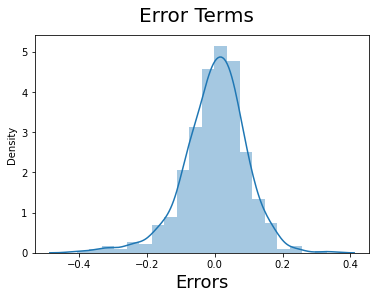

In [75]:
# Validating the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18) 

Error terms are normally distributed with a mean value ~ 0.


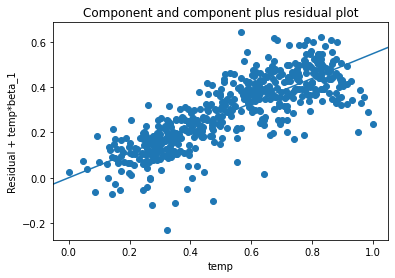

In [76]:
# Plot graph to check linearity w.r.t. 'temp' column

sm.graphics.plot_ccpr(lm7, 'temp')
plt.show()

The above plot represents linear relationship between the dependent and independent variable.

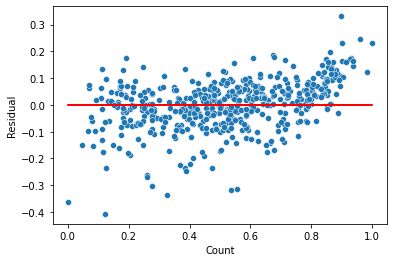

In [77]:

# Validating Homoscedasticity i.e. whether the residuals have constant variance w.r.t. the target variable 'cnt'

sns.scatterplot(y_train,(y_train - y_train_pred))
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

As we can see in the above plot, the variance of the residuals are almost constant. Hence, Homoscedasticity holds true by this model.

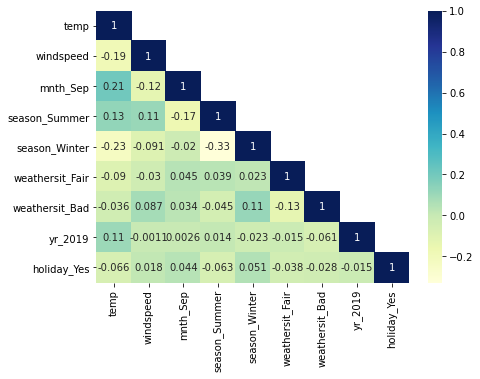

In [78]:
# Validating for multicollinearity

plt.figure(figsize=(7,5))
mask = np.array(X_train_new.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(X_train_new.corr(), mask = mask,annot=True, cmap='YlGnBu')
plt.show()

None of the variables have coefficient > 0.7 or < -0.7. Hence, we can safely say that this model is free from multicollinearity.

# Making Predictions Using the Final Model

Finally we will make prediction using the final model on our test data.

##### Applying the scaling on the test sets

In [79]:
# Apply scaler() to all the numerical columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [80]:
df_test.describe()

,temp,hum,windspeed,cnt,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,...,mnth_Nov,mnth_Dec,season_Summer,season_Fall,season_Winter,weathersit_Fair,weathersit_Bad,yr_2019,holiday_Yes,workingday_Yes
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.638508,0.313350,0.520592,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,...,0.073059,0.086758,0.264840,0.246575,0.232877,0.319635,0.027397,0.479452,0.036530,0.639269
std,0.233698,0.148974,0.159947,0.218435,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,...,0.260830,0.282125,0.442259,0.432005,0.423633,0.467403,0.163612,0.500722,0.188034,0.481313
min,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.759096,0.743928,0.403048,0.672745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Dividing Test data into X and y

In [81]:
y_test = df_test.pop('cnt')
X_test = df_test

In [82]:
# Creating X_test dataframe by selecting columns from final X_train

cols = X_train_new.columns
X_test = X_test[cols]

# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

# Making predictions using the 8th model

y_pred = lm7.predict(X_test)

### Model Evaluation on Test set

Text(0, 0.5, 'Predicted bike count\n')

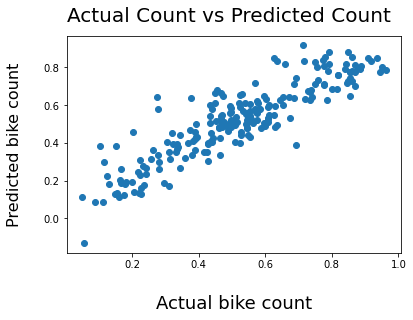

In [83]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('Actual Count vs Predicted Count\n', fontsize = 20)               
plt.xlabel('\nActual bike count', fontsize = 18)                          
plt.ylabel('Predicted bike count\n', fontsize = 16)   

We can see that we have got a decent model here. 

The equation for our model is -

###### cnt  =  0.1264  +  0.5480  ×  temp  +  0.2328  ×  yr_2019  +  0.1306  ×  season_Winter  +  0.1011  ×  mnth_Sep  +  0.0868  ×  season_Summer  - 0.2838  ×  weathersit_Bad  -  0.1533  ×  windspeed  - 0.0992  ×  holiday_Yes  - 0.0797  ×  weathersit_Fair

Since the coefficients of the independent variables are significant, we can reject the null hypothesis.

When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

In [84]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7938290016640651

where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.

# Conclusion

The demand seems to be high on good weather days with high temperature. So, the company must take action to promote or give discounts during summer season and also ensure the availibilty of enough bikes to fulfill the high demand during summer months to increase their sales or in this case rental bike counts.